# Checking Results

In [1]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sns.set_theme()


In [2]:
configs = pd.read_csv('./results_no_cv_HO_26_12').iloc[:300]

In [3]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,2.037194e+01,1.776858e+01,0.493754,10.511260,2.064205e+01,1.819137e+01,0.316019,11.039882,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 62,..."
1,7.578074e+01,5.648686e+01,-2.551426,103.418945,5.120919e+01,4.088745e+01,-1.308507,17.355362,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,1.611320e+02,1.277127e+02,-42.817646,0.753569,1.314109e+02,1.089698e+02,-118.790413,0.767642,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
3,5.651538e+05,1.787017e+04,-0.000990,0.341459,3.520836e+04,6.305594e+03,-0.032284,0.345109,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 41,..."
4,2.924472e+12,2.785623e+10,-0.000091,0.397280,4.833739e+08,6.460028e+07,-0.018186,0.399527,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [4]:
configs.shape

(300, 9)

In [5]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [6]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

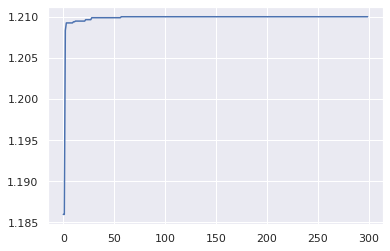

In [7]:
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume)

In [8]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,2.037194e+01,1.776858e+01,0.493754,10.511260,2.064205e+01,1.819137e+01,0.316019,11.039882,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 62,..."
1,7.578074e+01,5.648686e+01,-2.551426,103.418945,5.120919e+01,4.088745e+01,-1.308507,17.355362,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,1.611320e+02,1.277127e+02,-42.817646,0.753569,1.314109e+02,1.089698e+02,-118.790413,0.767642,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
3,5.651538e+05,1.787017e+04,-0.000990,0.341459,3.520836e+04,6.305594e+03,-0.032284,0.345109,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 41,..."
4,2.924472e+12,2.785623e+10,-0.000091,0.397280,4.833739e+08,6.460028e+07,-0.018186,0.399527,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [9]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']])

In [10]:
pareto_configs = configs.iloc[pareto_index]

In [11]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
200,18.189643,4.919597,6.751567e-01,8.894499,5.434538,3.468887,9.349574e-01,8.456756,"{""num_rec"": 2, ""max_time"": 43, ""neuron_0"": 99,..."
272,7.935490,4.568674,9.400340e-01,7.687612,6.789524,3.923380,9.305506e-01,7.760962,"{""num_rec"": 2, ""max_time"": 41, ""neuron_0"": 66,..."
195,13.958062,11.769796,6.102995e-01,5.585350,12.106392,10.956652,5.284980e-01,5.289072,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 39,..."
103,17.238467,12.676805,4.527947e-01,1.332783,14.655423,11.327129,2.346146e-01,1.272026,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 18,..."
224,36.894611,33.108042,-4.129793e+00,1.430962,37.536264,35.115437,-1.237074e+01,1.003573,"{""num_rec"": 2, ""max_time"": 28, ""neuron_0"": 47,..."
246,38.472264,32.050823,-6.491707e-01,0.088833,43.470823,38.522849,-2.752084e+00,0.083361,"{""num_rec"": 2, ""max_time"": 36, ""neuron_0"": 31,..."
287,57.594305,37.110806,1.278128e-01,0.064148,45.251690,38.870396,-8.484145e-01,0.060506,"{""num_rec"": 1, ""max_time"": 34, ""neuron_0"": 20,..."
88,103.057338,78.787347,-1.453749e+14,0.000180,75.655176,57.942114,0.000000e+00,0.000185,"{""num_rec"": 2, ""max_time"": 27, ""neuron_0"": 71,..."
57,101.059047,78.611986,-1.030767e+12,0.000078,75.997961,59.807786,-7.218148e+16,0.000100,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 71,..."


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

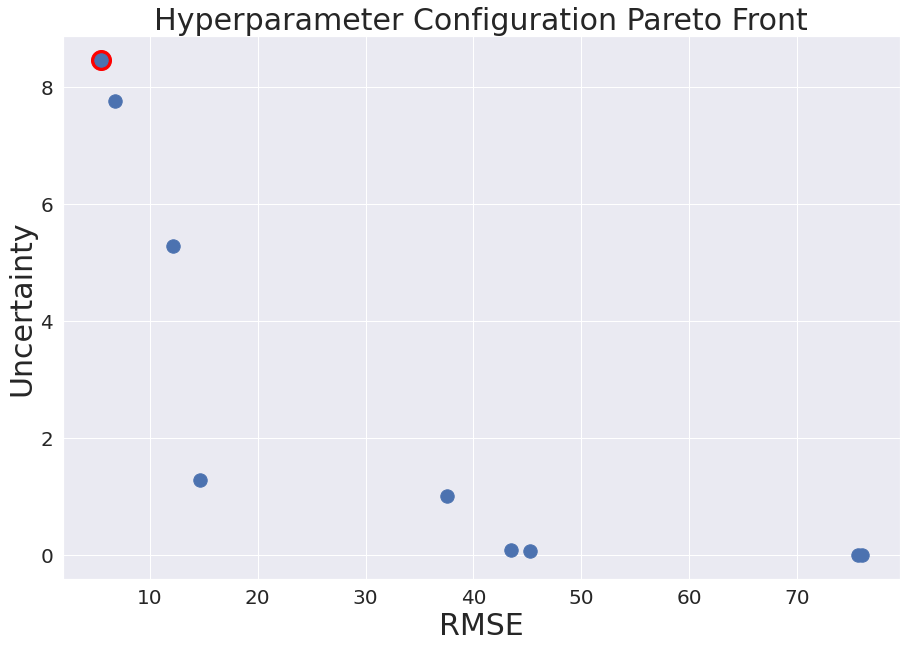

In [12]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('./paper_figures/cmapss_1.pdf', format='pdf')


# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

In [13]:
pareto_configs.loc[57].net_cfg

'{"num_rec": 2, "max_time": 26, "neuron_0": 71, "neuron_1": 27, "neuron_2": 75, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.13672090513412982, "rec_dropout_norm_1": 0.12495306711274264, "rec_dropout_norm_2": 0.5767908615754451, "recurrent_dropout_0": 0.2188625401775987, "recurrent_dropout_1": 0.6500430160007746, "recurrent_dropout_2": 0.7701282643309761, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 39, "rul": 128, "rul_style": "linear", "lr": "1e-1", "batch": "32", "num_den": 1, "neuron_den_0": 30, "neuron_den_1": 30, "neuron_den_2": 11, "activation_den_0": "sigmoid", "activation_den_1": "tanh", "activation_den_2": "sigmoid", "dropout_0": 0.3113349435470498, "dropout_1": 0.2836774170924121, "dropout_2": 0.6946742349861974}'

# Training full model on the best HP

In [20]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib as mpl

import json

In [21]:
net_cfg = {"num_rec": 2, "max_time": 43, "neuron_0": 99, "neuron_1": 29, "neuron_2": 91, "activation_rec_0": "tanh", "activation_rec_1": "tanh",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.2676413802689546, "rec_dropout_norm_1": 0.7268872117425176, "rec_dropout_norm_2": 0.25325887794611185,
  "recurrent_dropout_0": 0.6133767764205283, "recurrent_dropout_1": 0.4001463050672887, "recurrent_dropout_2": 0.21979950205865323, "final_activation_0": "exp",
   "final_activation_1": "softplus", "percentage": 72, "rul": 110, "rul_style": "nonlinear", "lr": "1e-4", "batch": "128", "num_den": 1, "neuron_den_0": 75,
    "neuron_den_1": 57, "neuron_den_2": 54, "activation_den_0": "tanh", "activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.4870627544679542,
     "dropout_1": 0.5930406005080269, "dropout_2": 0.7835258053930378}

net_cfg = {"num_rec": 2, "max_time": 41, "neuron_0": 66, "neuron_1": 14, "neuron_2": 51, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.15657630799773972, "rec_dropout_norm_1": 0.13849919191027446, "rec_dropout_norm_2": 0.8287873974314781,
  "recurrent_dropout_0": 0.7576445254991824, "recurrent_dropout_1": 0.6567775430485833, "recurrent_dropout_2": 0.27948800059442297, "final_activation_0": "exp",
   "final_activation_1": "softplus", "percentage": 69, "rul": 118, "rul_style": "nonlinear", "lr": "1e-2", "batch": "64", "num_den": 1, "neuron_den_0": 82,
    "neuron_den_1": 71, "neuron_den_2": 39, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.6935982211104356,
     "dropout_1": 0.21978819345219894, "dropout_2": 0.7450752474454989}

net_cfg = {"num_rec": 2, "max_time": 36, "neuron_0": 31, "neuron_1": 17, "neuron_2": 86, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.21135926565667135, "rec_dropout_norm_1": 0.2187909734011713, "rec_dropout_norm_2": 0.4256854511883782,
  "recurrent_dropout_0": 0.28719469339113773, "recurrent_dropout_1": 0.47212832389588016, "recurrent_dropout_2": 0.24457506303406634, "final_activation_0": "softplus",
   "final_activation_1": "exp", "percentage": 53, "rul": 114, "rul_style": "nonlinear", "lr": "2e-5", "batch": "64", "num_den": 1, "neuron_den_0": 51,
    "neuron_den_1": 61, "neuron_den_2": 24, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.6854430219550793,
     "dropout_1": 0.28369213313398917, "dropout_2": 0.3877689800606505}

net_cfg = {"num_rec": 1, "max_time": 34, "neuron_0": 20, "neuron_1": 60, "neuron_2": 55, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.21350828140369646, "rec_dropout_norm_1": 0.6310408352364498, "rec_dropout_norm_2": 0.3991388655467644,
  "recurrent_dropout_0": 0.16902266079941158, "recurrent_dropout_1": 0.1923100135359868, "recurrent_dropout_2": 0.4085007132710682, "final_activation_0": "softplus",
   "final_activation_1": "softplus", "percentage": 53, "rul": 122, "rul_style": "nonlinear", "lr": "2e-5", "batch": "128", "num_den": 1, "neuron_den_0": 41,
    "neuron_den_1": 29, "neuron_den_2": 38, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.5024593147699109,
     "dropout_1": 0.4696092654411853, "dropout_2": 0.3755032141842874}

net_cfg = {"num_rec": 2, "max_time": 27, "neuron_0": 71, "neuron_1": 42, "neuron_2": 31, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.6734362387483886, "rec_dropout_norm_1": 0.16607707221054605, "rec_dropout_norm_2": 0.18842229750980594,
  "recurrent_dropout_0": 0.12611045705804966, "recurrent_dropout_1": 0.7816224936283626, "recurrent_dropout_2": 0.43869320411257984, "final_activation_0": "exp",
   "final_activation_1": "softplus", "percentage": 41, "rul": 117, "rul_style": "linear", "lr": "1e-1", "batch": "32", "num_den": 1, "neuron_den_0": 19,
    "neuron_den_1": 47, "neuron_den_2": 11, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.20467627218028245,
     "dropout_1": 0.3635860489151302, "dropout_2": 0.4882957975978467}

net_cfg = {"num_rec": 2, "max_time": 26, "neuron_0": 71, "neuron_1": 27, "neuron_2": 75, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.13672090513412982, "rec_dropout_norm_1": 0.12495306711274264, "rec_dropout_norm_2": 0.5767908615754451,
  "recurrent_dropout_0": 0.2188625401775987, "recurrent_dropout_1": 0.6500430160007746, "recurrent_dropout_2": 0.7701282643309761, "final_activation_0": "exp",
   "final_activation_1": "softplus", "percentage": 39, "rul": 128, "rul_style": "linear", "lr": "1e-1", "batch": "32", "num_den": 1, "neuron_den_0": 30,
    "neuron_den_1": 30, "neuron_den_2": 11, "activation_den_0": "sigmoid", "activation_den_1": "tanh", "activation_den_2": "sigmoid", "dropout_0": 0.3113349435470498,
     "dropout_1": 0.2836774170924121, "dropout_2": 0.6946742349861974}

net_cfg = {"num_rec": 2, "max_time": 28, "neuron_0": 47, "neuron_1": 90, "neuron_2": 46, "activation_rec_0": "tanh", "activation_rec_1": "tanh", "activation_rec_2": "sigmoid"
, "rec_dropout_norm_0": 0.09076263128413331, "rec_dropout_norm_1": 0.34220939710743997, "rec_dropout_norm_2": 0.4643908627811889,
 "recurrent_dropout_0": 0.12026202802015229, "recurrent_dropout_1": 0.6945618020184302, "recurrent_dropout_2": 0.4054790485481173, "final_activation_0": "softplus",
  "final_activation_1": "exp", "percentage": 60, "rul": 122, "rul_style": "nonlinear", "lr": "2e-5", "batch": "32", "num_den": 1, "neuron_den_0": 49, 
  "neuron_den_1": 83, "neuron_den_2": 35, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.6194401382371761,
   "dropout_1": 0.823859933740691, "dropout_2": 0.4840005813943691}

In [22]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [23]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [24]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [25]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD003.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD003.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD003.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [26]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


100%|██████████| 100/100 [00:00<00:00, 9747.39it/s]


In [27]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (24720, 28, 18) train_y (24720, 1) test_x (100, 28, 18) test_y (100, 1)


In [28]:
# k.clear_session()
# try:
#     del model
# except:
#     pass

# model3, history = network(train_x, train_y, net_cfg, cfg)

In [29]:
model = tf.keras.models.load_model('./Final_experiments/dataset_3/224/saved_models_5_1/cp-0100.ckpt/', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [30]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 18)]          0         
_________________________________________________________________
masking (Masking)            (None, 28, 18)            0         
_________________________________________________________________
gru (GRU)                    (None, 28, 47)            9447      
_________________________________________________________________
gru_1 (GRU)                  (None, 90)                37530     
_________________________________________________________________
dense (Dense)                (None, 2)                 182       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 47,159
Trainable params: 47,159
Non-trainable params: 0
________________________________________________

In [31]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [32]:
# test_results_df

In [33]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [34]:
# train_results_df

In [35]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [36]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [37]:
# Results=pd.concat([Results,results57])
# Results.to_csv('Final_experiments/dataset_3/Results', index=False)

In [38]:
Results = pd.read_csv('./Final_experiments/dataset_3/Results')

In [39]:
results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,15.346226,12.622725,0.745934,5.022429,28.049817,22.720292,0.269053,6.51624,"{""num_rec"": 2, ""max_time"": 28, ""neuron_0"": 47,..."


In [40]:
pareto_configs.reset_index(drop=True, inplace=True)

In [41]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,7.575404,4.336924,9.239237e-01,9.207510,29.552284,24.566884,8.435993e-02,10.955388,"{""num_rec"": 2, ""max_time"": 43, ""neuron_0"": 99,..."
1,9.186297,5.339990,8.978573e-01,5.832856,33.674919,27.582440,-1.261073e-01,8.039048,"{""num_rec"": 2, ""max_time"": 41, ""neuron_0"": 66,..."
2,11.224087,7.647560,8.294404e-01,6.333294,30.380470,25.293960,4.640427e-02,7.102947,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 39,..."
3,17.002123,8.833919,5.634647e-01,4.584947,28.584963,23.038121,1.701253e-01,4.842565,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 18,..."
4,15.346226,12.622725,7.459343e-01,5.022429,28.049817,22.720292,2.690534e-01,6.516240,"{""num_rec"": 2, ""max_time"": 28, ""neuron_0"": 47,..."
5,48.582587,43.046125,-5.173757e+00,0.112687,49.159559,39.988679,-7.879014e+00,0.124297,"{""num_rec"": 2, ""max_time"": 36, ""neuron_0"": 31,..."
6,49.879267,38.173469,-2.611979e-01,0.057543,39.821387,31.566101,-9.135834e-01,0.066144,"{""num_rec"": 1, ""max_time"": 34, ""neuron_0"": 20,..."
7,93.771359,71.642471,-1.291496e+01,7.087929,68.007954,57.031587,-3.769305e+00,10.293589,"{""num_rec"": 2, ""max_time"": 27, ""neuron_0"": 71,..."
8,108.860192,80.573080,-1.102285e+16,0.000009,45.198604,38.100121,-1.117981e+15,0.000009,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 71,..."


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

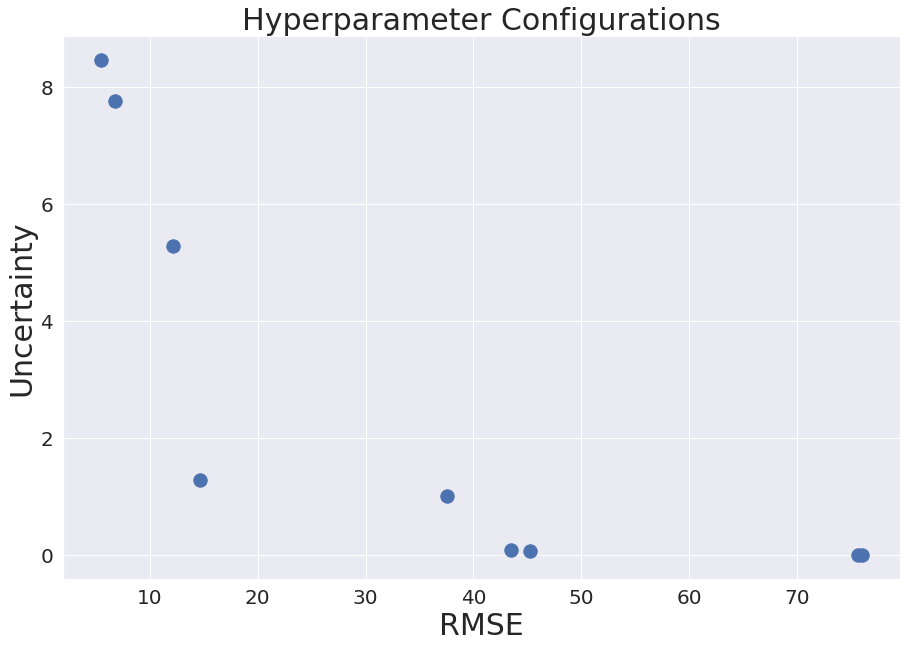

In [42]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('./paper_figures/cmapss_3.pdf', format='pdf')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

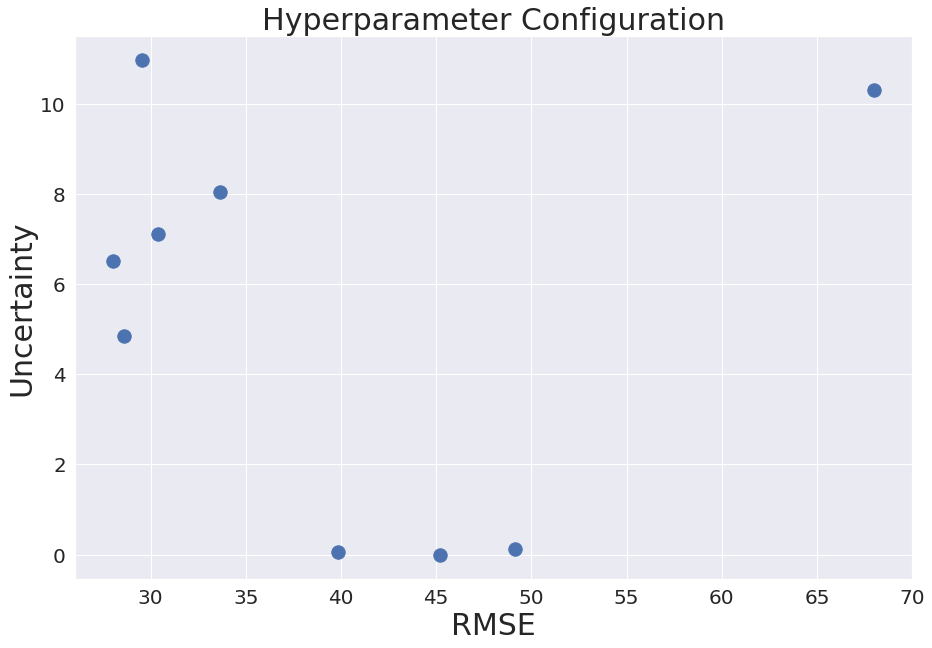

In [43]:
x = Results['rmse_test'].values
y = Results['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('./paper_figures/cmapss_3_obj.pdf', format='pdf')


# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

In [44]:
Results['rank'] = pareto_configs.index

In [45]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,7.575404,4.336924,9.239237e-01,9.207510,29.552284,24.566884,8.435993e-02,10.955388,"{""num_rec"": 2, ""max_time"": 43, ""neuron_0"": 99,...",0
1,9.186297,5.339990,8.978573e-01,5.832856,33.674919,27.582440,-1.261073e-01,8.039048,"{""num_rec"": 2, ""max_time"": 41, ""neuron_0"": 66,...",1
2,11.224087,7.647560,8.294404e-01,6.333294,30.380470,25.293960,4.640427e-02,7.102947,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 39,...",2
3,17.002123,8.833919,5.634647e-01,4.584947,28.584963,23.038121,1.701253e-01,4.842565,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 18,...",3
4,15.346226,12.622725,7.459343e-01,5.022429,28.049817,22.720292,2.690534e-01,6.516240,"{""num_rec"": 2, ""max_time"": 28, ""neuron_0"": 47,...",4
5,48.582587,43.046125,-5.173757e+00,0.112687,49.159559,39.988679,-7.879014e+00,0.124297,"{""num_rec"": 2, ""max_time"": 36, ""neuron_0"": 31,...",5
6,49.879267,38.173469,-2.611979e-01,0.057543,39.821387,31.566101,-9.135834e-01,0.066144,"{""num_rec"": 1, ""max_time"": 34, ""neuron_0"": 20,...",6
7,93.771359,71.642471,-1.291496e+01,7.087929,68.007954,57.031587,-3.769305e+00,10.293589,"{""num_rec"": 2, ""max_time"": 27, ""neuron_0"": 71,...",7
8,108.860192,80.573080,-1.102285e+16,0.000009,45.198604,38.100121,-1.117981e+15,0.000009,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 71,...",8


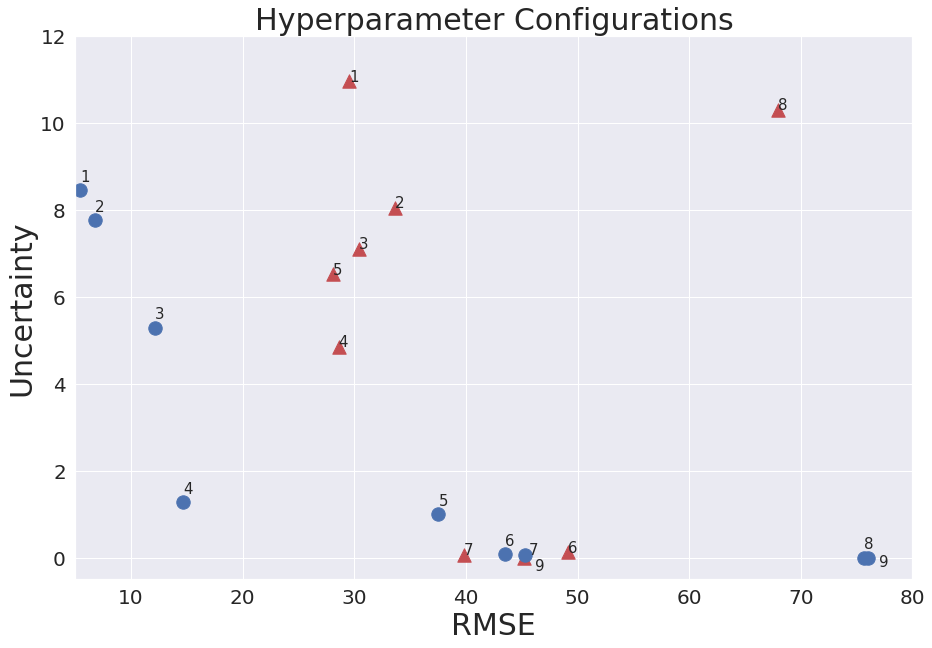

In [353]:
x = Results['rmse_test'].values
y = Results['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5,80)
plt.ylim(-0.5,12)

for i, txt in enumerate(Results['rank']):
    if i==8:
        plt.annotate(txt+1, (x[i]+1, y[i]-0.3), fontsize=15)
    else:
        plt.annotate(txt+1, (x[i], y[i]), fontsize=15)


for i, txt in enumerate(pareto_configs.index):
    if i==8:
        plt.annotate(txt+1, (x_prime[i]+1, y_prime[i]-0.2), fontsize=15)
    elif i==6:
        plt.annotate(txt+1, (x_prime[i]+0.4, y_prime[i]), fontsize=15)
    else:
        plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

plt.savefig('./paper_figures/cmapss_3_obj_space.pdf', format='pdf')


***

### Plots

In [46]:
def surv(alpha, beta, t):
    return np.exp(-np.power(t/alpha, beta))

In [47]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [48]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

In [49]:
def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)

In [50]:
def weibull_mode(alpha, beta):
    # assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)

In [51]:
def weibull_variance(alpha, beta):
    var = alpha**2*(math.gamma(1+2/beta)-math.gamma(1+1/beta)**2)
    return var

In [52]:
def plot_weibull_variance(results_df):

    plt.figure(figsize=(30,20))
    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            color = color_dict[i]
            variance = weibull_variance(alpha, beta)

            plt.scatter(i, variance, color=color)
            plt.text(i, variance+0.5, i*5)
            plt.title('Weibull distributions variance')
            # plt.legend()


In [53]:
# def plot_weibull_predictions(results_df):

#     plt.figure(figsize=(30,20)) 

#     t=np.arange(0,150)

#     palette = sns.color_palette("Spectral_r", results_df.shape[0] + 1)  # "RdBu_r"
#     color_dict = dict(enumerate(palette))

#     for i, row in enumerate(results_df.iterrows()):
#             print(i)
#             print(row[1])
#             alpha=row[1]['median_alpha']
#             beta = row[1]['median_beta']
#             T = row[1]['T']
#             label = 'a={} b={}'.format(alpha, beta)
#             color = color_dict[i]
#             # mode = weibull_mode(alpha, beta)
#             mean = weibull_mean(alpha, beta)
#             # y_max = weibull_pdf(alpha, beta, mode)    

#             plt.plot(t, weibull_pdf(alpha, beta, t), color=color, linewidth=2)  # label=label
#             # plt.axvline(mean, color='r', linestyle='--')

#             plt.title('Evolution of RUL distributions (unit=2)', fontsize=60)
#             plt.xlabel('Time to Failure', fontsize=60)
#             plt.xlim(150,0)
#             plt.ylabel('Probability of Failure', fontsize=60)
#             plt.xticks(fontsize=50)
#             plt.yticks(fontsize=50)
#             plt.colorbar(color_dict)
    

#     # plt.savefig('./paper_figures/cmapss_3_WB.pdf', format='pdf')
#     plt.show()


In [54]:
def plot_weibull_predictions(results_df, u):

    fig, ax = plt.subplots(figsize=(30,20))

    t=np.arange(0,150)

    # palette = sns.color_palette("RdBu", results_df.shape[0] + 1)  # "RdBu_r"
    # color_dict = dict(enumerate(palette))
    c = np.arange(1, results_df.shape[0] + 1)
    palette = mpl.cm.get_cmap('RdBu_r', results_df.shape[0])
    dummie_cax = ax.scatter(c, c, c=c, cmap=palette)
    ax.cla()

    for i, row in enumerate(results_df.iterrows()):
        #     print(i)
        #     print(row[1])
            alpha=row[1]['median_alpha']
            beta = row[1]['median_beta']
            # T = row[1]['T']
            # label = 'a={} b={}'.format(alpha, beta)
            # color = color_dict[i]
            # mode = weibull_mode(alpha, beta)
            # mean = weibull_mean(alpha, beta)
            # y_max = weibull_pdf(alpha, beta, mode)    

            ax.plot(t, weibull_pdf(alpha, beta, t), c=palette(i), linewidth=2)  # label=label
            # plt.axvline(mean, color='r', linestyle='--')

            ax.set_title('Evolution of RUL distributions (unit='+str(u+1)+')', fontsize=60)
            ax.set_xlabel('Time to Failure', fontsize=60)
            ax.set_xlim(150,0)
            ax.set_ylabel('Probability of Failure', fontsize=60)
            ax.tick_params(labelsize=50)
            # ax.set_xticks(fontsize=50)
            # plt.yticks(fontsize=50)
    cbar = fig.colorbar(dummie_cax)
    # cbar.set_ticks([])
    cbar.ax.tick_params(labelsize=50)

    plt.savefig('./paper_figures/cmapss_3_WB.pdf', format='pdf')
    plt.show()


In [347]:
u = 8
s = train_results_df[train_results_df.unit_number==u].iloc[::5]
s.shape

(82, 9)

<ipython-input-134-10ae6e98afeb>:2: RuntimeWarning: divide by zero encountered in power
  return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)


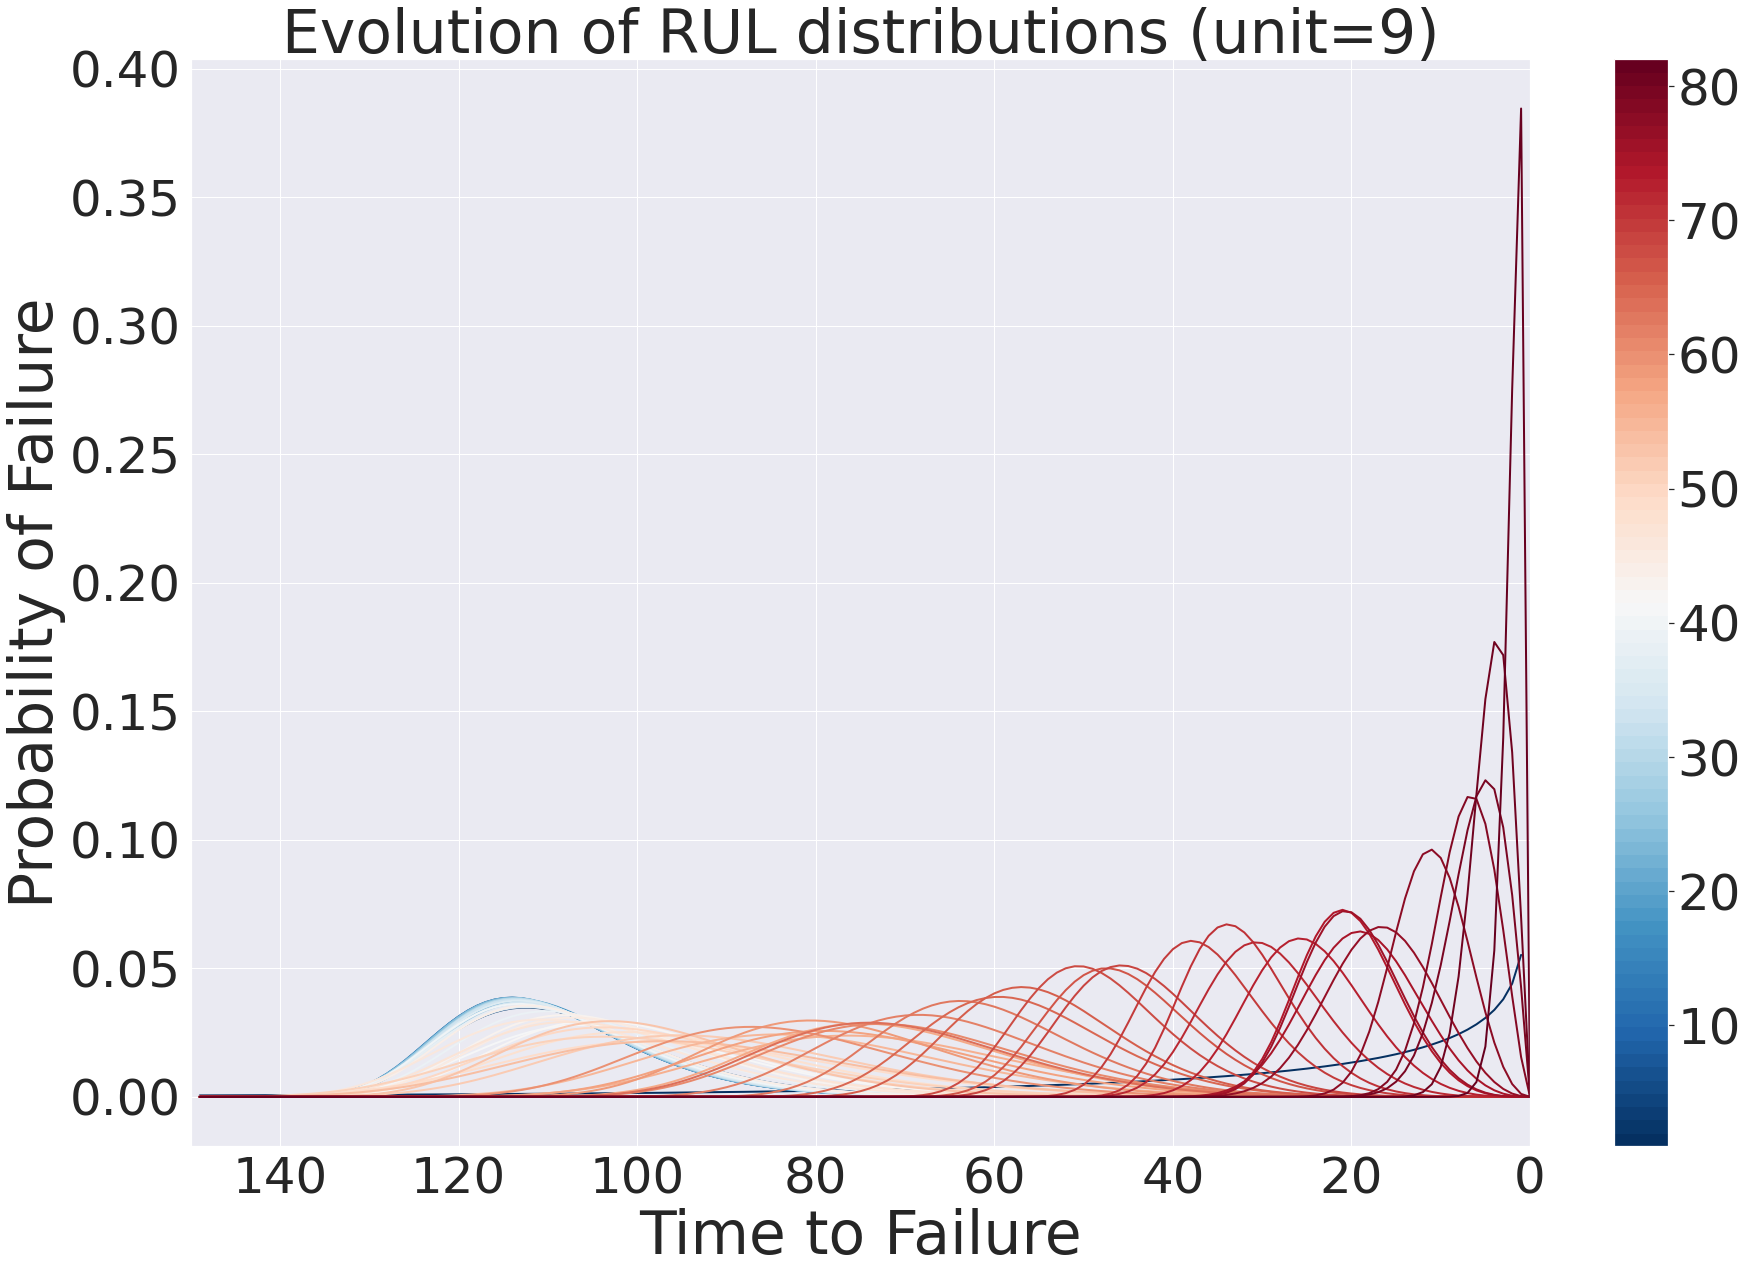

In [348]:
plot_weibull_predictions(s, u)

In [299]:
train_results_df

,T,median_alpha,median_beta,std_alpha,std_beta,unit_number,time,predicted_mu,uncertainty
0,122.0,32.044220,0.702139,2.560416,0.049453,0,0,40.444840,1.304935
1,122.0,77.943741,2.351953,4.067008,0.354941,0,1,69.072123,2.210975
2,122.0,102.625557,6.186853,3.023780,0.956939,0,2,95.368611,1.990359
3,122.0,111.103516,9.077799,1.844855,0.984010,0,3,105.252125,1.414433
4,122.0,112.521805,10.200622,0.838163,0.808505,0,4,107.137256,0.823334
...,...,...,...,...,...,...,...,...,...
24715,10.0,18.596933,1.955036,14.705236,0.761693,99,147,16.489036,7.733464
24716,8.0,17.617161,1.895092,17.812113,1.105317,99,148,15.634131,9.458715
24717,6.0,24.399237,2.063533,17.309748,0.913777,99,149,21.613522,9.111763
24718,4.0,18.664885,1.659428,21.113314,0.875964,99,150,16.682913,10.994638


***

### Confidence Intervals

In [349]:
# for i in test_results_df_or.index:
#     print(f'prediction: {i} --> alpha CI: [{test_results_df_or.iloc[i]["mean_alpha"] - 1.96*test_results_df_or.iloc[i]["std_alpha"]},\
#       #     {test_results_d_or.iloc[i]["mean_alpha"] + 1.96*test_results_df_or.iloc[i]["std_alpha"]}]')
#     print(f'prediction: {i} --> beta CI: [{test_results_df_or.iloc[i]["mean_beta"] - 1.96*test_results_df_or.iloc[i]["std_beta"]}, \
#           {test_results_df_or.iloc[i]["mean_beta"] + 1.96*test_results_df_or.iloc[i]["std_beta"]}]')
#     print('\n')

In [350]:
test_results_df

,T,median_alpha,median_beta,std_alpha,std_beta,predicted_mu,uncertainty
0,44.0,62.706818,6.445257,11.193050,1.323696,58.402342,6.258373
1,51.0,106.318321,6.299116,20.418320,3.649311,98.897262,12.033815
2,27.0,34.469948,6.910510,7.412740,2.250156,32.222854,4.831448
3,120.0,114.298935,11.733002,8.729952,2.227719,109.438326,5.478835
4,101.0,115.141083,12.080952,0.247565,0.184483,110.365676,0.216024
...,...,...,...,...,...,...,...
95,113.0,78.522324,6.239975,16.120874,1.337293,73.003902,8.729083
96,123.0,114.967133,11.948656,0.761325,0.654306,110.153699,0.707816
97,17.0,28.167873,2.619524,16.749344,1.081623,25.024649,8.915483
98,8.0,14.941955,2.763265,6.418796,1.820925,13.298527,4.119861


In [63]:
survs = pd.DataFrame()

a,b,c = 27,2,13

t=np.arange(0,150)
median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[a][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs['mean'] = surv(median_alpha, median_beta, t)
survs['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

survs1 = pd.DataFrame()

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[b][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs1['mean'] = surv(median_alpha, median_beta, t)
survs1['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs1['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

survs2 = pd.DataFrame()

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[c][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs2['mean'] = surv(median_alpha, median_beta, t)
survs2['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs2['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

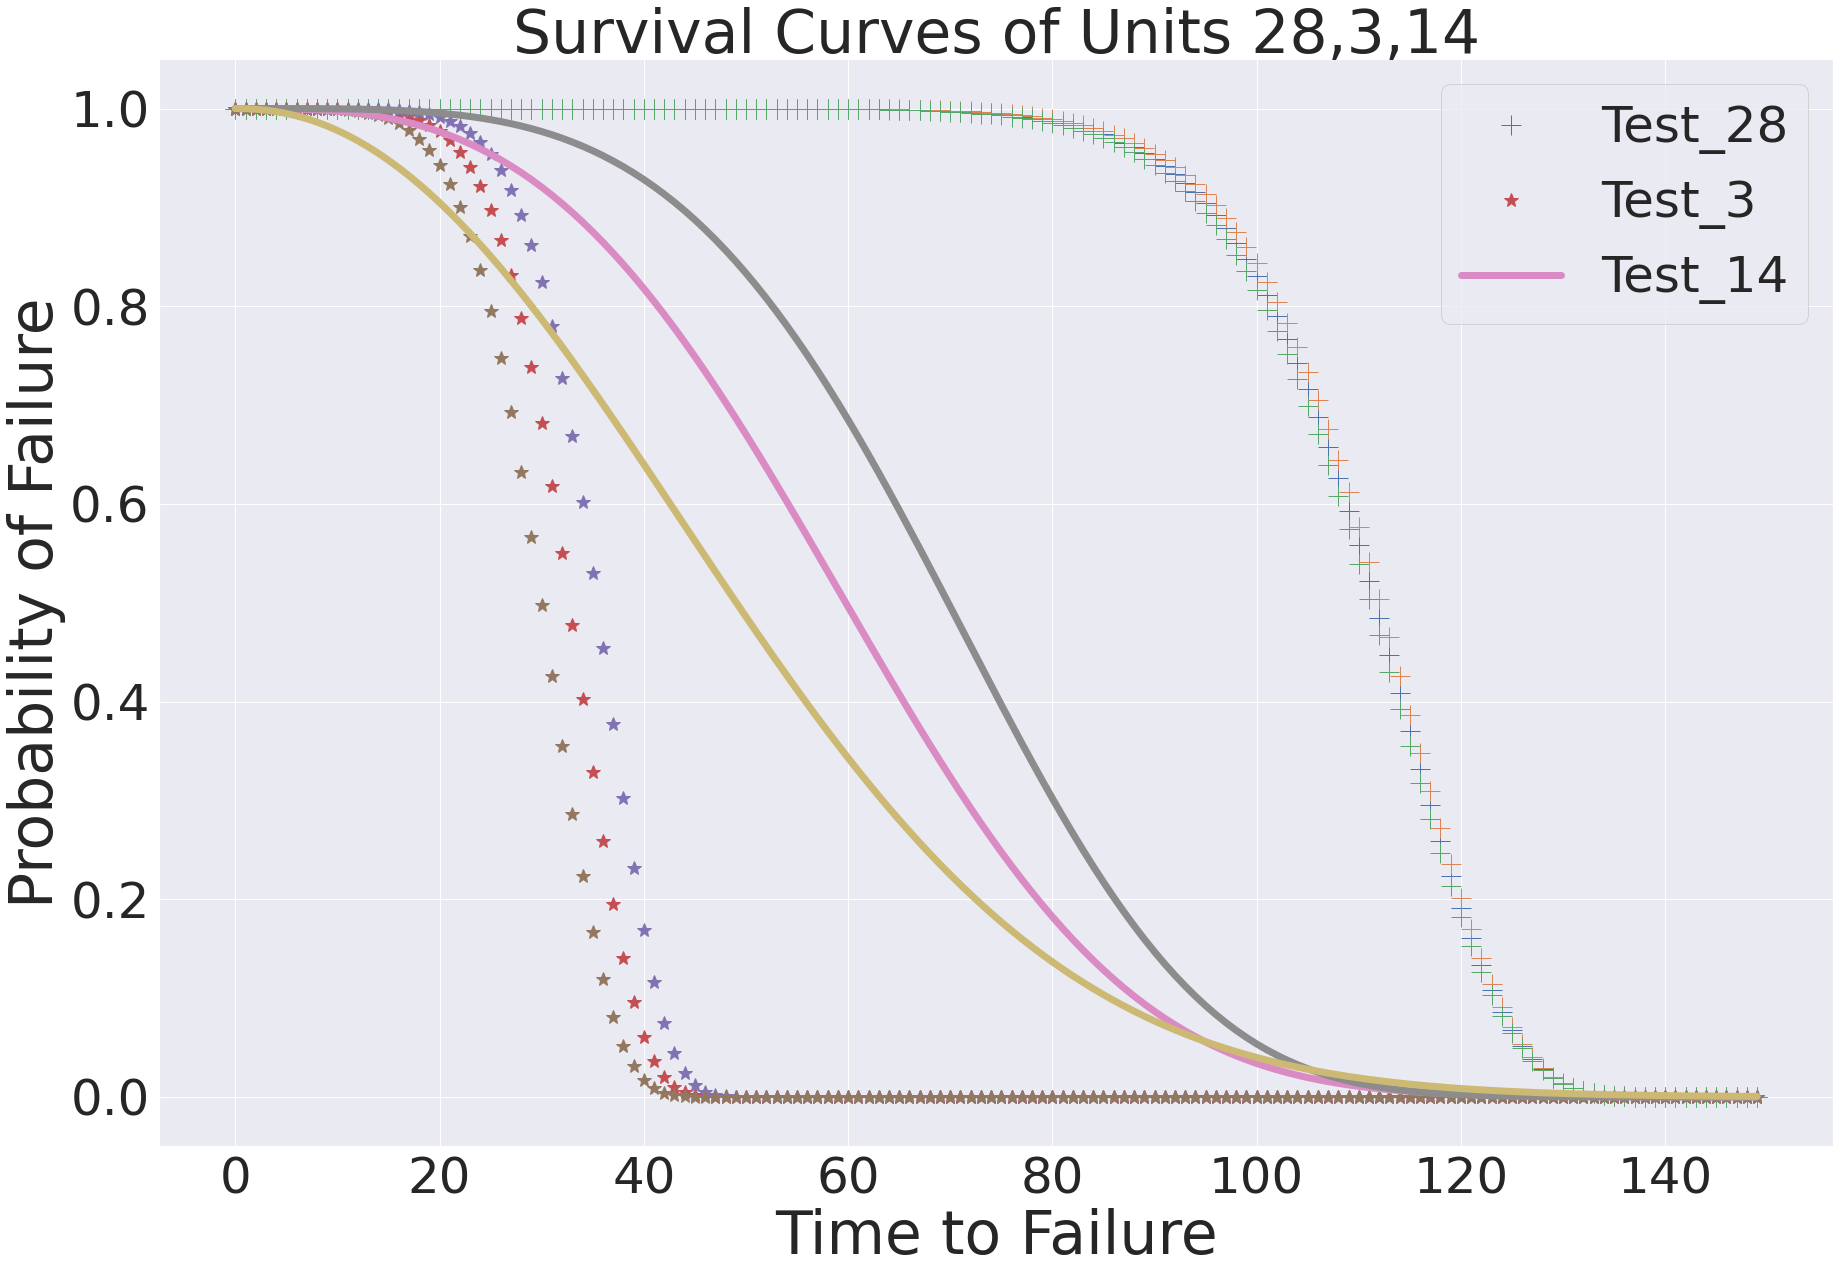

In [64]:
plt.subplots(figsize=(30, 20))

plt.plot(t, survs['mean'], '+', label='Test_'+str(a+1), markersize=20)
plt.plot(t, survs['mean+std'], '+', markersize=20)
plt.plot(t, survs['mean-std'], '+', markersize=20)

plt.plot(t, survs1['mean'], '*', label='Test_'+str(b+1), markersize=15)
plt.plot(t, survs1['mean+std'], '*', markersize=15)
plt.plot(t, survs1['mean-std'], '*', markersize=15)

plt.plot(t, survs2['mean'], label='Test_'+str(c+1), linewidth=7)
plt.plot(t, survs2['mean+std'], linewidth=7)
plt.plot(t, survs2['mean-std'], linewidth=7)

plt.legend(prop={'size': 50})

plt.title(f'Survival Curves of Units {a+1},{b+1},{c+1}', fontsize=60)
plt.xlabel('Time to Failure', fontsize=60)
plt.ylabel('Probability of Failure', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.savefig('./paper_figures/cmapss_3_SC.pdf', format='pdf')


Correcting the CI for the **median** (before I did mean)

In [59]:
survs = pd.DataFrame()

a,b,c = 27,2,13


A = np.hstack(test_predict_1)
B = np.hstack(test_predict_2)

i = int(30*0.5 - 1.96*np.sqrt(30*0.5*0.5))  # lower
j = int(30*0.5 + 1.96*np.sqrt(30*0.5*0.5))  # upper

t=np.arange(0,150)


A_ = sorted(A[a,:])
B_ = sorted(B[a,:])
median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[a][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs['median'] = surv(median_alpha, median_beta, t)
survs['median_upper'] = surv(A_[j], B_[j], t)
survs['median_lower'] = surv(A_[i], B_[i], t)

survs1 = pd.DataFrame()

A_ = sorted(A[b,:])
B_ = sorted(B[b,:])

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[b][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs1['median'] = surv(median_alpha, median_beta, t)
survs1['median_upper'] = surv(A_[j], B_[j], t)
survs1['median_lower'] = surv(A_[i], B_[i], t)

survs2 = pd.DataFrame()
A_ = sorted(A[c,:])
B_ = sorted(B[c,:])

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[c][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs2['median'] = surv(median_alpha, median_beta, t)
survs2['median_upper'] = surv(A_[j], B_[j], t)
survs2['median_lower'] = surv(A_[i], B_[i], t)

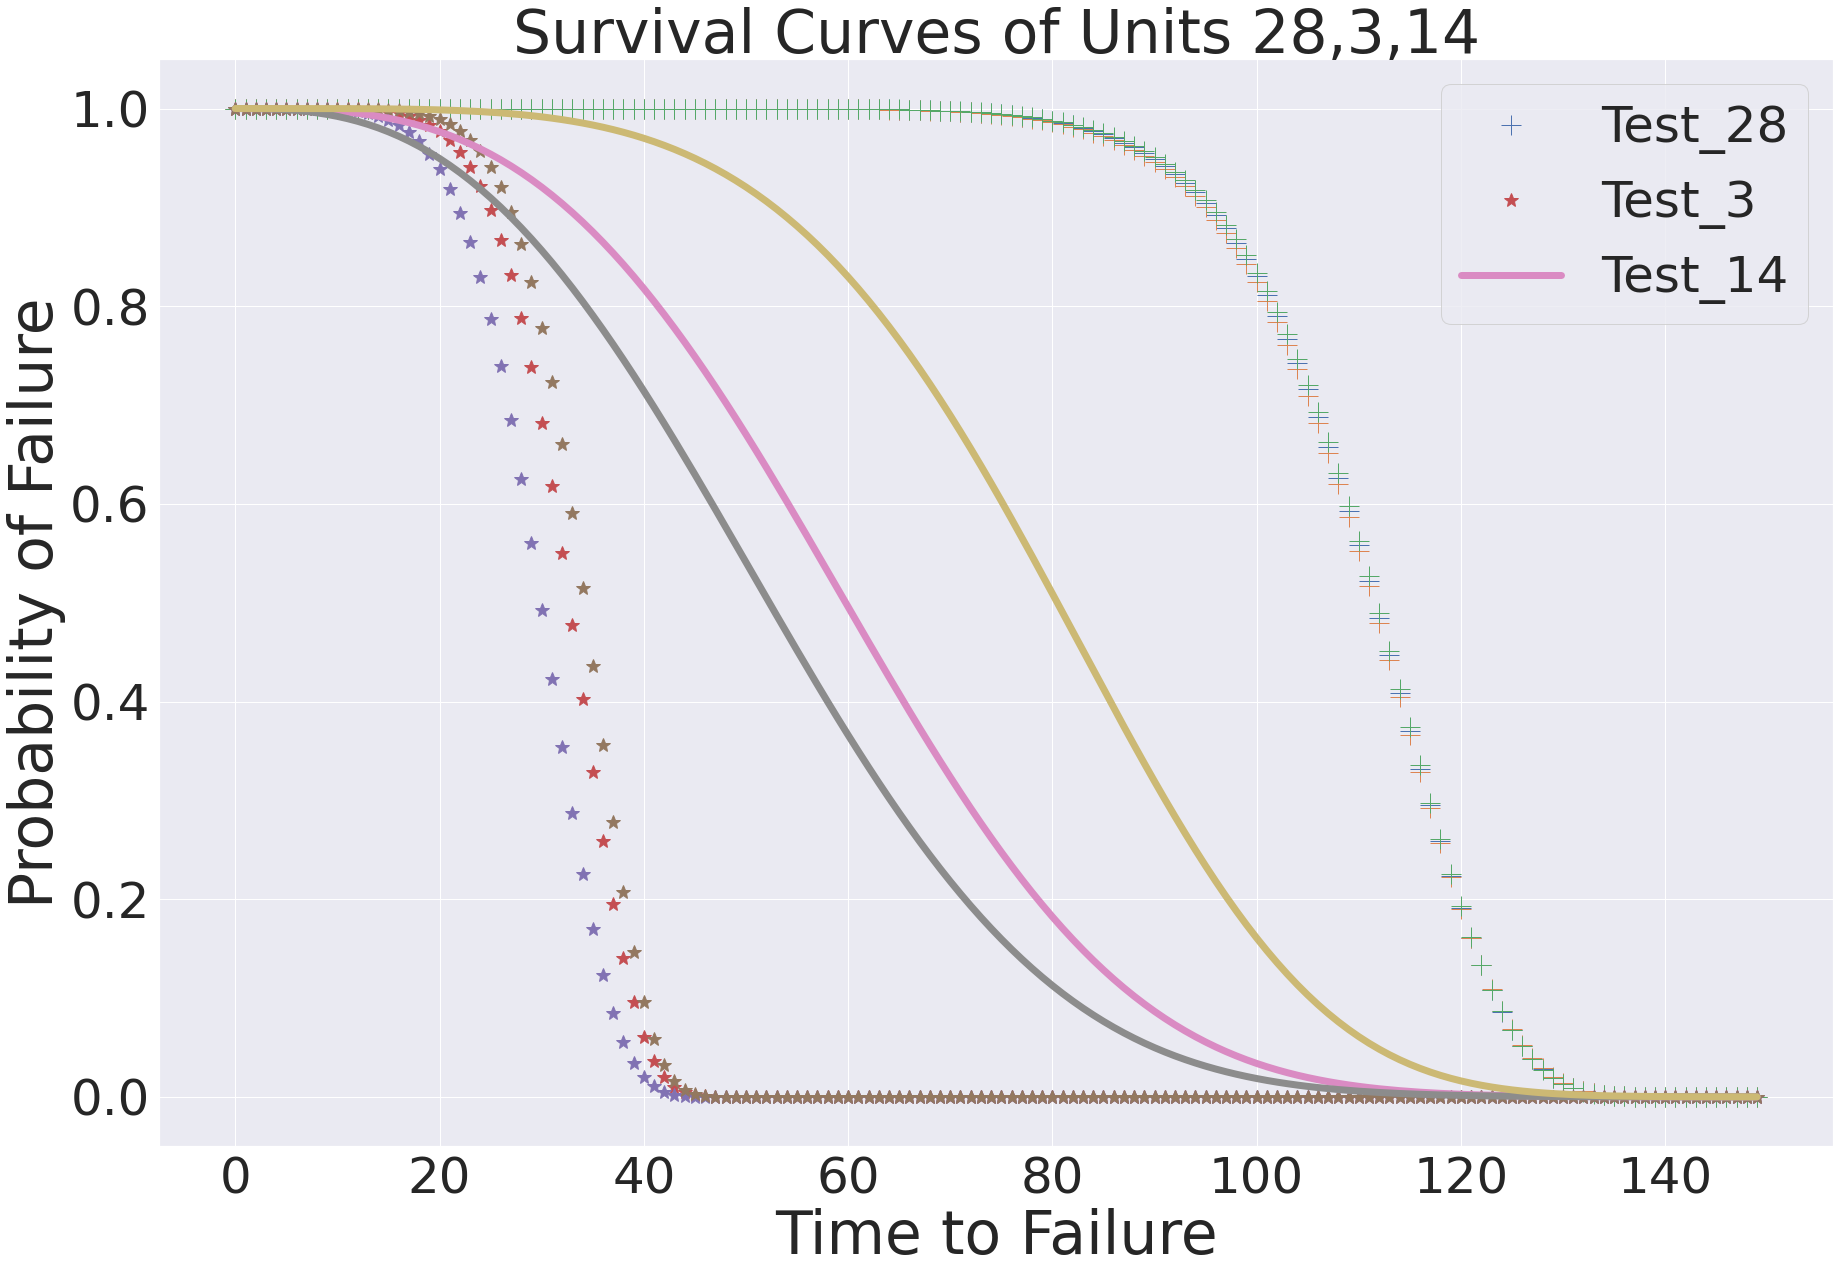

In [61]:
plt.subplots(figsize=(30, 20))

plt.plot(t, survs['median'], '+', label='Test_'+str(a+1), markersize=20)
plt.plot(t, survs['median_lower'], '+', markersize=20)
plt.plot(t, survs['median_upper'], '+', markersize=20)

plt.plot(t, survs1['median'], '*', label='Test_'+str(b+1), markersize=15)
plt.plot(t, survs1['median_lower'], '*', markersize=15)
plt.plot(t, survs1['median_upper'], '*', markersize=15)

plt.plot(t, survs2['median'], label='Test_'+str(c+1), linewidth=7)
plt.plot(t, survs2['median_lower'], linewidth=7)
plt.plot(t, survs2['median_upper'], linewidth=7)

plt.legend(prop={'size': 50})

plt.title(f'Survival Curves of Units {a+1},{b+1},{c+1}', fontsize=60)
plt.xlabel('Time to Failure', fontsize=60)
plt.ylabel('Probability of Failure', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.savefig('./paper_figures/cmapss_3_SC_median.pdf', format='pdf')
